In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sb

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DevanshRathiji/datasets/main/Password_data.csv',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping lin

In [ ]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
data['strength'].unique()

array([1, 2, 0])

In [ ]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [ ]:
data.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


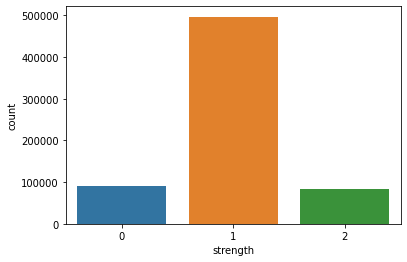

In [ ]:
sb.countplot(data.strength)

In [ ]:
password_tuple=np.array(data)

In [ ]:
X = [labels[0] for labels in password_tuple]
y = [labels[1] for labels in password_tuple]

In [ ]:
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [ ]:
len(X)

669639

In [ ]:
X=vectorizer.fit_transform(X)

In [ ]:
X.shape

(669639, 153)

In [ ]:
print(X)

  (0, 41)	0.5913033374804587
  (0, 39)	0.5668990475107434
  (0, 60)	0.221689578545907
  (0, 59)	0.2856314454344638
  (0, 81)	0.3359256904431869
  (0, 66)	0.2922467650108519
  (1, 38)	0.6177740147525559
  (1, 37)	0.5602425115534002
  (1, 70)	0.25649928309246306
  (1, 69)	0.26770311076536885
  (1, 64)	0.2519907735724838
  (1, 66)	0.321756751659985
  (2, 73)	0.2894510846576453
  (2, 80)	0.33760964730400084
  (2, 35)	0.2261102829164477
  (2, 74)	0.29731144435173845
  (2, 77)	0.39246472118131376
  (2, 64)	0.527990462866844
  (2, 41)	0.3410120562248123
  (2, 66)	0.33708475479286015
  (3, 36)	0.30323421767408737
  (3, 62)	0.4010456064880801
  (3, 68)	0.3498334199966546
  (3, 80)	0.3906222854709323
  (3, 35)	0.2616149040367047
  :	:
  (669636, 34)	0.2910319203906559
  (669636, 42)	0.3278337368686998
  (669636, 58)	0.33655295850307515
  (669636, 56)	0.21511034432170514
  (669636, 36)	0.25833498206981703
  (669636, 68)	0.29803434116195854
  (669636, 73)	0.28531352718392095
  (669636, 35)	0.22287

In [ ]:
first_document_vector=X[0]

In [ ]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56689905],
        [0.        ],
        [0.59130334],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
7,0.591303
5,0.566899
z,0.335926
k,0.292247
d,0.285631
...,...
\,0.000000
],0.000000
^,0.000000
_,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape

(535711, 153)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression(random_state=0,multi_class='multinomial',max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=0)

In [ ]:
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

In [ ]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.40     17989
           1       0.84      0.94      0.88     99477
           2       0.81      0.68      0.74     16462

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.67    133928
weighted avg       0.80      0.82      0.80    133928

